In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
# import numpy as np
# import pyswarms as ps

# # Define your objective function
# def objective_function(x):
#     return np.sum(x**2, axis=1)

# # Define your constraints
# def constraint1(x):
#     return 2 - np.sum(x, axis=1)

# def constraint2(x):
#     return np.diff(x, axis=1).flatten() - 1

# # Define the penalty function
# def penalty_function(x, r=1e4):
#     penalties = np.maximum(0, constraint1(x)) + np.maximum(0, constraint2(x))
#     return r * np.sum(penalties)

# # Define the penalized objective function
# def penalized_objective_function(x):
#     return objective_function(x) + penalty_function(x)

# # Set the bounds of the search space
# bounds = (np.array([-5, -5]), np.array([5, 5]))

# # Initialize the PSO optimizer
# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
# optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

# # Optimize the penalized objective function
# cost, pos = optimizer.optimize(penalized_objective_function, iters=1000)

# print("Optimal solution found at position:", pos, "with cost:", cost)

2023-05-03 19:14:20,992 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=6.01e+5
2023-05-03 19:14:25,670 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 601005.7733212649, best pos: [0.00638842 0.02923788]


Optimal solution found at position: [0.00638842 0.02923788] with cost: 601005.7733212649


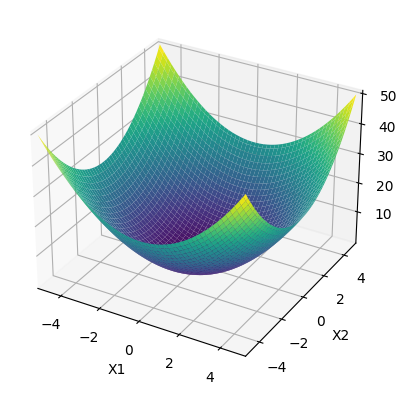

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function
def objective_function(x):
    return np.sum(x**2, axis=1)

# Create a meshgrid for the input values within the bounds of -5 to 5
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Combine the meshgrid values into a 2D array
X = np.column_stack((X1.ravel(), X2.ravel()))

# Evaluate the objective function for the input values
Y = objective_function(X)

# Reshape the output to match the shape of the meshgrid
Y = Y.reshape(X1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Y, cmap='viridis')

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Define the objective function
def objective_function(x):
    return np.sum(x**2, axis=1)

# Define the input variables that minimize the objective function
min_variables = np.array([0, 0])

# Evaluate the objective function at the minimum variables
min_value = objective_function(min_variables.reshape(1, -1))[0]

# Print the results
print("Minimum variables:", min_variables)
print("Minimum value of the objective function:", min_value)


Minimum variables: [0 0]
Minimum value of the objective function: 0


In [ ]:
import numpy as np
import pyswarms as ps

# Define your objective function
def objective_function(x):
    # return -((((150 * x[:, 0] * ( (x[:, 1] / 86100)))**10 - ((90 * x[:, 1] + 18 * (x[:, 2] * x[:, 1]) + 8 * (x[:, 1] * (x[:, 3]/x[:, 1] - 24) + 3 * x[:, 4])) * (1- (x[:, 5] / 30000) ** 0.75)))))**0.01
    return -((x[:, 0]*3)  -  (x[:, 1]))

# Define your constraints

def constraint0(x):
    return  -x[:, 0] + 10


def constraint1(x):
    return  (x[:, 2] * x[:, 1]) - 10* x[:, 0]

def constraint2(x):
    return x[:, 3]/x[:, 1] - 128

# def constraint3(x):
#     return 24 - x[:, 3]/x[:, 1]

def constraint4(x):
    return x[:, 2] * x[:, 1] - 3 * x[:, 1]

def constraint5(x):
    return x[:, 5]* x[:, 2] -90

def constraint6(x):
    return x[:, 1] - 4 * x[:, 4]

def constraint7(x):
    return x[:, 1] - x[:, 0]

# Define the penalty function
def penalty_function(x, r=1e12):
    penalties =  np.maximum(0, constraint1(x)) + np.maximum(0, constraint2(x)) + np.maximum(0, constraint4(x)) + np.maximum(0, constraint5(x)) + np.maximum(0, constraint6(x)) + np.maximum(0, constraint7(x))
    # penalties =  np.maximum(0, constraint0(x))
    return r * np.sum(penalties)

# Define the penalized objective function
def penalized_objective_function(x):
    return objective_function(x) + penalty_function(x)

# Set the bounds of the search space
lower_bounds = np.array([1, 1, 1, 1, 1, 1])
upper_bounds = np.array([120, 861, 3, 128* 86,86, 30])

bounds = (lower_bounds, upper_bounds)

# Initialize the PSO optimizer
options = {'c1': 2, 'c2': 2, 'w': 0.9, 'k':4, 'p':1}
optimizer = ps.discrete.binary.BinaryPSO(n_particles=500, dimensions=6, options=options)

# Optimize the penalized objective function
cost, pos = optimizer.optimize(penalized_objective_function, iters=500)

print("Optimal solution found at position:", pos, "with cost:", cost)

2023-05-04 18:19:02,661 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 4, 'p': 1}
pyswarms.discrete.binary:   0%|          |0/500<ipython-input-72-c9fba9920e5b>:19: RuntimeWarning: divide by zero encountered in true_divide
  return x[:, 3]/x[:, 1] - 128
<ipython-input-72-c9fba9920e5b>:19: RuntimeWarning: invalid value encountered in true_divide
  return x[:, 3]/x[:, 1] - 128
pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=-2
2023-05-04 18:19:05,963 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -2.0, best pos: [1 1 1 1 1 0]


Optimal solution found at position: [1 1 1 1 1 0] with cost: -2.0


In [ ]:
!pip install pyswarms
import pyswarms as ps

# Set the bounds of the search space
lower_bounds = np.array([0, 0, 0, 0, 0, 0])
upper_bounds = np.array([2400, 2400, 2400, 2000,2000, 2000])

bounds = (lower_bounds, upper_bounds)

# Initialize the PSO optimizer
options = {'c1': 2, 'c2': 2, 'w': 0.9,}
optimizer = ps.single.GlobalBestPSO(n_particles=500, dimensions=6, options=options)

# Optimize the penalized objective function
cost, pos = optimizer.optimize(penalized_objective_function, iters=500)

print("Optimal solution found at position:", pos, "with cost:", cost)

In [ ]:
print(constraint0(np.array([pos])))


print(constraint1(np.array([pos])))
print(constraint2(np.array([pos])))
print(constraint3(np.array([pos])))
print(constraint4(np.array([pos])))
print(constraint5(np.array([pos])))
print(constraint6(np.array([pos])))
print(constraint7(np.array([pos])))

[-1.19983555]
[615.89030603]
[-99.67605047]
[-4.32394953]
[-217.34464787]
[-45.14835515]
[96.07458039]
[303.87793426]


In [ ]:
1

1

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x):
    t, p, h = x
    revenue = 150 * p
    costs = (100 * t + 10 * h)
    profit = revenue - costs
    return -profit  # Negate the profit function

# Define the constraints
def constraint1(x):
    return 120 - x[1]

def constraint2(x):
    return 36 * x[0] - x[2]

def constraint3(x):
    return x[2] - 24 * x[0]

def constraint4(x):
    return 861 - x[0]

# Define the initial guess
initial_guess = np.array([1000, 1, 1])

# Define the bounds for each variable (optional)
bounds = [(0, None), (0, None), (0, None)]

# Define the constraints in the form required by scipy.optimize
constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3},
    {'type': 'ineq', 'fun': constraint4},
]

# Call the minimize function with the SLSQP method
result = minimize(
    objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints
)

# Print the results
if result.success:
    print("Optimal solution:", result.x)
    print("Objective function value at the optimal solution:", result.fun)
else:
    print("Optimization did not converge.")
    print("Reason:", result.message)


Optimal solution: [  0. 120.   0.]
Objective function value at the optimal solution: -18000.000000629236


In [ ]:
print(constraint1(result.x))
print(constraint2(result.x))
print(constraint3(result.x))
print(constraint4(result.x))


-4.194916414235195e-09
0.0
0.0
861.0


In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 51.1 MB/s eta 0:00:00


In [ ]:
import pulp

# Problem data
demands = [10, 20, 40]
costs = [
    [5, 7, 9],
    [6, 8, 11]
]
max_trips = [50, 50]
num_trucks = len(costs)
num_locations = len(demands)

# Create the problem instance
problem = pulp.LpProblem("Trucking Company Optimization", pulp.LpMinimize)

# Define the decision variables
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(num_trucks) for j in range(num_locations)), lowBound=0, cat='Integer')

# Define the objective function
problem += pulp.lpSum(costs[i][j] * x[(i, j)] + (0.2 * x[(i, j)]) for i in range(num_trucks) for j in range(num_locations))

# Add the demand constraints
for j in range(num_locations):
    problem += pulp.lpSum(x[(i, j)] for i in range(num_trucks)) >= demands[j]

# Add the maximum trips constraints
for i in range(num_trucks):
    problem += pulp.lpSum(x[(i, j)] for j in range(num_locations)) <= max_trips[i]

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
for i in range(num_trucks):
    for j in range(num_locations):
        print(f"Truck {i+1} trips to location {j+1}: {x[(i, j)].value()}")

print("Total cost:", pulp.value(problem.objective))


Status: Optimal
Truck 1 trips to location 1: 0.0
Truck 1 trips to location 2: 10.0
Truck 1 trips to location 3: 40.0
Truck 2 trips to location 1: 10.0
Truck 2 trips to location 2: 10.0
Truck 2 trips to location 3: 0.0
Total cost: 584.0


In [ ]:
trucks = [0,1]
locations = [0, 1, 2]
fuel_efficiencies = [5,7]
x = [[0,0,0],[1,1,1]]
costs = [[3,2,5],[2,4,1]]

In [ ]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=20fbf8a2ba73aecfcc028c299401c6dfd9a931450fb0ad65fb5db2993db58a5a
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
4459178.12-6000000

-1540821.88

In [ ]:
def objective_function(x):
  total_cost = 0
  for i in range(len(trucks)):
    for j in range(len(locations)):
     total_cost += ((distance[j] * x[i*3+j])/e[i])* 3.68 + (0.4 * x[i*3+j])**2
  return  - (6000000 - total_cost)

# Define your constraints

def constraint1(x):
    return  800 - (x[: ,0] + x[:1*3+0])

def constraint2(x):
    return 1400 - (x[0*3+1] + x[1*3+1])

def constraint3(x):
    return 600 - (x[0*3+2] + x[1*3+2])

def constraint4(x):
    return (x[0*3+0]  + x[0*3+1] + x[0*3+2]) - 2400

def constraint5(x):
    return (x[1*3+0] + x[1*3+1] + x[1*3+2]) - 2000

# Define the penalty function
def penalty_function(x, r=1e12):
    penalties =  np.maximum(0, constraint1(x)) + np.maximum(0, constraint2(x))  + np.maximum(0, constraint3(x)) + np.maximum(0, constraint4(x)) + np.maximum(0, constraint5(x))
    return r * np.sum(penalties)

# Define the penalized objective function
def penalized_objective_function(x):
    return objective_function(x) + penalty_function(x)

 The best solution found:
 [ 529. 1373.  150.  380.   85.  480.]

 Objective function:
 -4487470.784


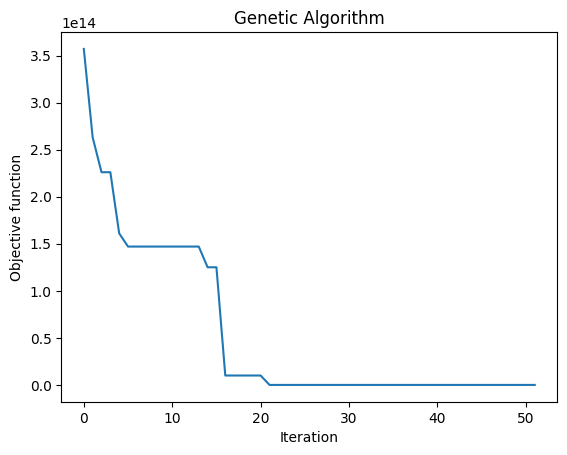


Objective function for iteration 1 is 262999996535566.12
Objective function for iteration 2 is 225999996421826.38
Objective function for iteration 3 is 225999996421826.38
Objective function for iteration 4 is 160999996553824.94
Objective function for iteration 5 is 146999996165082.75
Objective function for iteration 6 is 146999996165082.75
Objective function for iteration 7 is 146999996165082.75
Objective function for iteration 8 is 146999996165082.75
Objective function for iteration 9 is 146999996165082.75
Objective function for iteration 10 is 146999996165082.75
Objective function for iteration 11 is 146999996065901.16
Objective function for iteration 12 is 146999996065901.16
Objective function for iteration 13 is 146999996065901.16
Objective function for iteration 14 is 124999996635316.08
Objective function for iteration 15 is 124999996635316.08
Objective function for iteration 16 is 9999996400638.52
Objective function for iteration 17 is 9999996400638.52
Objective function for ite

In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

trucks = [0,1]
locations = [0, 1, 2]
distance = [315.8,566,689]
e=[6,4]






# varbound=np.array([[0,2400],[0,2400],[0,2400],[0,2000],[0,2000],[0,2000]])
# vartype=np.array([['int'],['int'],['int'],['int'],['int'],['int']])
# model=ga(function=penalized_objective_function,
#          dimension=6,
#          variable_type_mixed=vartype,
#          variable_boundaries=varbound)


varbound=np.array([[0,2400],[0,2400],[0,2400],[0,2000],[0,2000],[0,2000]])
vartype=np.array([['int'],['int'],['int'],['int'],['int'],['int']])
model=ga(function=penalized_objective_function,
         dimension=6,
         variable_type_mixed=vartype,
         variable_boundaries=varbound, algorithm_parameters={'max_num_iteration': 100,\
                                       'population_size':25,\
                                       'mutation_probability':0.1,\
                                       'elit_ratio': 0.01,\
                                       'crossover_probability': 0.5,\
                                       'parents_portion': 0.3,\
                                       'crossover_type':'uniform',\
                                       'max_iteration_without_improv':10},\
                     convergence_curve=True,\
                         progress_bar=True)


model.run()

for I in ["Objective function for iteration " + str(x) +" is "+ str(y) for  x,y in enumerate( model.report)]:
    print(I)

In [ ]:
x=[539., 983., 578., 261., 417.,  22.]
x=[773., 455., 753.,  28., 968.,   1.]
# [ 688.  165.  620.  114. 1257.    9.]
x = [300.41757627 ,720.32270695 ,679.25971577 ,499.58242392 ,679.67729339,520.74028136]

print(constraint1(x))
print(constraint2(x))
print(constraint3(x))
print(constraint4(x))
print(constraint5(x))

-1.9000003703695256e-07
-3.4000004234258085e-07
-599.9999971299999
-700.00000101
-300.00000133000003


In [ ]:
import pyswarms as ps
import numpy as np

def objective_function(x):
  total_cost = 0
  for i in range(len(trucks)):
    for j in range(len(locations)):
     total_cost += ((distance[j] * x[:, i*3+j])/e[i])* 3.68 + (0.4 * x[:,i*3+j])**2
  return (total_cost)

# Define your constraints

def constraint1(x):
    return  800 - (x[:, 0] + x[:,3])

def constraint2(x):
    return 1400 - (x[:,1] + x[:,4])

def constraint3(x):
    return 600 - (x[:,2] + x[:,5])

def constraint4(x):
    return (x[:,0]  + x[:,1] + x[:,2]) - 2400

def constraint5(x):
    return (x[:,3] + x[:,4] + x[:,5]) - 2000

# Define the penalty function
def penalty_function(x, r=1e12):
    penalties =  np.maximum(0, constraint1(x)) + np.maximum(0, constraint2(x))  + np.maximum(0, constraint3(x)) + np.maximum(0, constraint4(x)) + np.maximum(0, constraint5(x))
    return r * np.sum(penalties)

# Define the penalized objective function
def penalized_objective_function(x):
    return objective_function(x) + penalty_function(x)


trucks = [0,1]
locations = [0, 1, 2]
distance = [315.8,566,689]
e=[6,4]


# Set the bounds of the search space
lower_bounds = np.array([0, 0, 0, 0, 0, 0])
upper_bounds = np.array([2400, 2400, 2400, 2000,2000, 2000])

bounds = (lower_bounds, upper_bounds)

# Initialize the PSO optimizer
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9,}
optimizer = ps.single.GlobalBestPSO(n_particles=6000, dimensions=6, options=options)

# Optimize the penalized objective function
cost, pos = optimizer.optimize(penalized_objective_function, iters=6000)

print("Optimal solution found at position:", pos, "with cost:", cost)

2023-05-11 01:37:01,587 - pyswarms.single.global_best - INFO - Optimize for 6000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|6000/6000, best_cost=1.68e+19
2023-05-11 01:37:46,997 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6752498193563742e+19, best pos: [2.01853178 0.49266469 0.44105987 1.87265609 0.48164498 0.85276137]


Optimal solution found at position: [2.01853178 0.49266469 0.44105987 1.87265609 0.48164498 0.85276137] with cost: 1.6752498193563742e+19


In [ ]:
# Define the initial guess
initial_guess = np.array([1000, 1, 1])

# Define the bounds for each variable (optional)
bounds = [(0, None), (0, None), (0, None)]

# Define the constraints in the form required by scipy.optimize
constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3},
    {'type': 'ineq', 'fun': constraint4},
]

# Call the minimize function with the SLSQP method
result = minimize(
    objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints
)

# Print the results
if result.success:
    print("Optimal solution:", result.x)
    print("Objective function value at the optimal solution:", result.fun)
else:
    print("Optimization did not converge.")
    print("Reason:", result.message)


In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x):
    total_cost = 0
    for i in range(len(trucks)):
        for j in range(len(locations)):
            total_cost += ((distance[j] * x[i*3+j])/e[i]) * 3.68 + (0.4 * x[i*3+j])**2
    return -(6000000 - total_cost)

def constraint1(x):
    return 800 - (x[0] + x[3])

def constraint2(x):
    return 1400 - (x[1] + x[4])

def constraint3(x):
    return 600 - (x[2] + x[5])

def constraint4(x):
    return (x[0] + x[1] + x[2]) - 2400

def constraint5(x):
    return (x[3] + x[4] +x[5]) - 2000

trucks = [0, 1]
locations = [0, 1, 2]
distance = [315.8, 566, 689]
e = [6, 4]

bounds = [(0, 2400), (0, 2400), (0, 2400), (0, 2000), (0, 2000), (0, 2000)]

x0 = np.array([400, 700, 600, 400, 700, 600])  # Initial guess

constraints = (
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3},
    {'type': 'ineq', 'fun': constraint4},
    {'type': 'ineq', 'fun': constraint5}
)

result = minimize(objective_function, x0, bounds=bounds, constraints=constraints, method='SLSQP')

print("Optimal solution:", result.x)
print("Objective function value at the optimal solution:", -result.fun)



Optimal solution: [300.41757627 720.32270695 679.25971577 499.58242392 679.67729339
 520.74028136]
Objective function value at the optimal solution: 4247037.337440252
